# Feature Selection and Dimensionality Reduction

### Feature Selection
Using the [Scanpy implementation](https://scanpy.readthedocs.io/en/1.10.x/generated/scanpy.pp.highly_variable_genes.html) of the Seurat v3 algorithm. We will select the top 5000 most deviant genes obtained through this method.

In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import rc_context
FIG_PATH = '/group/ll005/cmcphan/notebooks/analysis/results/figures/'

In [2]:
adata_list = []
adata_list.append(ad.read_h5ad('/group/ll005/cmcphan/herring_data/Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad'))
adata_list.append(ad.read_h5ad('/group/ll005/cmcphan/sepp_data/sepp_human_normal.h5ad'))
adata_list.append(ad.read_h5ad('/group/ll005/cmcphan/sepp_data/sepp_mouse_normal.h5ad'))
adata_list.append(ad.read_h5ad('/group/ll005/cmcphan/sepp_data/sepp_opossum_normal.h5ad'))

In [3]:
# Calculate highly variable genes in each dataset using Seurat v3 model, which expects raw count data
sc.pp.highly_variable_genes(adata_list[1], n_top_genes=5000, flavor='seurat_v3', inplace=True)
sc.pp.highly_variable_genes(adata_list[2], n_top_genes=5000, flavor='seurat_v3', inplace=True)
sc.pp.highly_variable_genes(adata_list[3], n_top_genes=5000, flavor='seurat_v3', inplace=True)

In [4]:
adata_list[1]
# Note new var columns with gene variance rankings and data

AnnData object with n_obs × n_vars = 157202 × 27260
    obs: 'orig_cluster', 'orig_sub_cluster', 'broad_lineage', 'cell_type', 'dev_state', 'subtype', 'precisest_label', 'species', 'Tissue', 'TissueID', 'batch', 'Capture.System', 'UMAP1', 'UMAP2', 'Stage', 'stage.ord', 'Stage_exact', 'size_factor', 'sex', 'age', 'fragment', 'rqn_cytoplasm', 'nuclei_preparation', 'chromium_version', 'numerical_age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito'
    var: 'ensembl_gene_id', 'gene_symbol', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Tissue_colors', 'batch_colors', 'batch_colors_dict', 'batch_order', 'fragment_colors', 'nuclei_preparation_colors', 'hvg'
    layers: 'binarized_cts', 'downsampled_cts', 'ds_norm_cts'

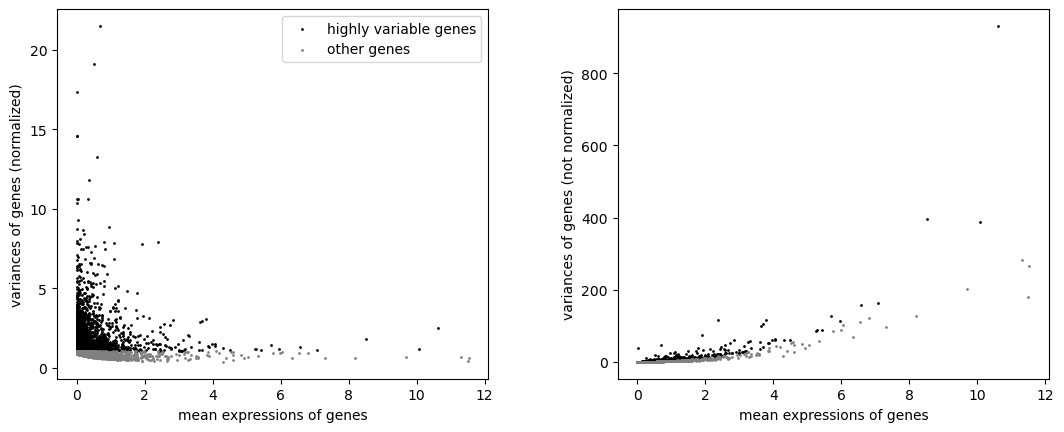

In [5]:
sc.pl.highly_variable_genes(adata_list[1])

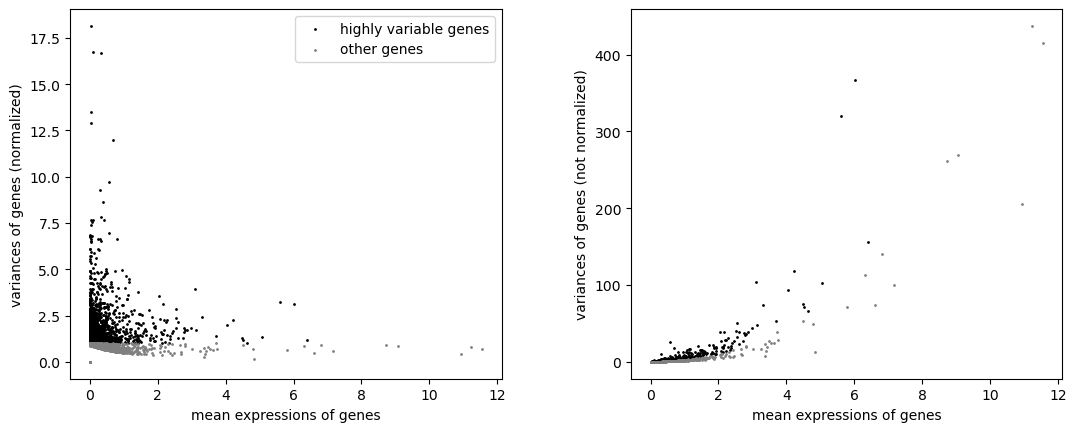

In [6]:
sc.pl.highly_variable_genes(adata_list[2])

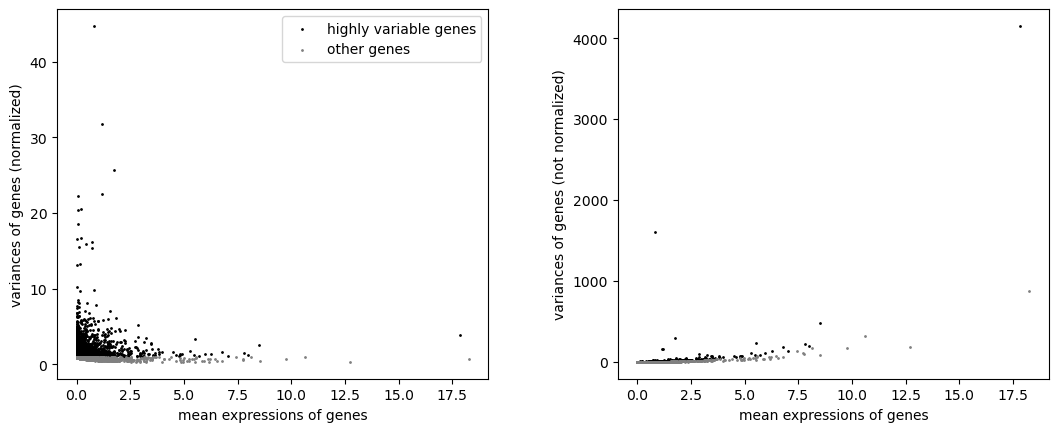

In [7]:
sc.pl.highly_variable_genes(adata_list[3])

In [8]:
# List most highly variable genes by rank
adata_list[1].var[adata_list[1].var['highly_variable']==True].sort_values(by='highly_variable_rank')

ensembl_gene_id gene_symbol  n_cells  n_cells_by_counts  \
ENSG00000150995  ENSG00000150995       ITPR1    24398              23622   
ENSG00000101439  ENSG00000101439        CST3    29832              28143   
ENSG00000168542  ENSG00000168542      COL3A1      874                853   
ENSG00000276070  ENSG00000276070      CCL4L2      123                110   
ENSG00000275302  ENSG00000275302        CCL4      110                 89   
...                          ...         ...      ...                ...   
ENSG00000267342  ENSG00000267342                   55                 53   
ENSG00000255086  ENSG00000255086                   95                 94   
ENSG00000271937  ENSG00000271937                  182                180   
ENSG00000231312  ENSG00000231312   MAP4K3-DT    38229              37222   
ENSG00000165259  ENSG00000165259         HDX    27973              27196   

                 mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
ENSG00000150995     0.629533           0.488294              86.295044   
ENSG00000101439     0.479708           0.391845              83.672060   
ENSG00000168542     0.018426           0.018259              99.505108   
ENSG00000276070     0.004827           0.004815              99.936180   
ENSG00000275302     0.005013           0.005000              99.948364   
...                      ...                ...                    ...   
ENSG00000267342     0.000319           0.000319              99.969251   
ENSG00000255086     0.000580           0.000580              99.945463   
ENSG00000271937     0.001108           0.001108              99.895568   
ENSG00000231312     0.319724           0.277423              78.404627   
ENSG00000165259     0.215925           0.195505              84.221489   

                 total_counts  log1p_total_counts  highly_variable  \
ENSG00000150995      108507.0           11.594579             True   
ENSG00000101439       82683.0           11.322782             True   
ENSG00000168542        3176.0            8.063693             True   
ENSG00000276070         832.0            6.725034             True   
ENSG00000275302         864.0            6.762730             True   
...                       ...                 ...              ...   
ENSG00000267342          55.0            4.025352             True   
ENSG00000255086         100.0            4.615120             True   
ENSG00000271937         191.0            5.257495             True   
ENSG00000231312       55108.0           10.917068             True   
ENSG00000165259       37217.0           10.524548             True   

                 highly_variable_rank     means  variances  variances_norm  
ENSG00000150995                   0.0  0.686244  45.852721       21.495553  
ENSG00000101439                   1.0  0.509459  19.373455       19.077494  
ENSG00000168542                   2.0  0.020114   0.413766       17.351468  
ENSG00000276070                   3.0  0.005178   0.181702       14.603855  
ENSG00000275302                   4.0  0.005159   0.169114       14.589618  
...                               ...       ...        ...             ...  
ENSG00000267342                4995.0  0.000350   0.000388        1.053954  
ENSG00000255086                4996.0  0.000636   0.000712        1.053883  
ENSG00000271937                4997.0  0.001215   0.001366        1.053876  
ENSG00000231312                4998.0  0.340702   0.601417        1.053873  
ENSG00000165259                4999.0  0.232841   0.365216        1.053809  

[5000 rows x 14 columns]

### Dimensionality Reduction
PCA, then construct nearest neighbour graph for use in UMAP. We will use the binarized count data from the 5000 most highly informative genes for this and use it for clustering and cell type annotations. 

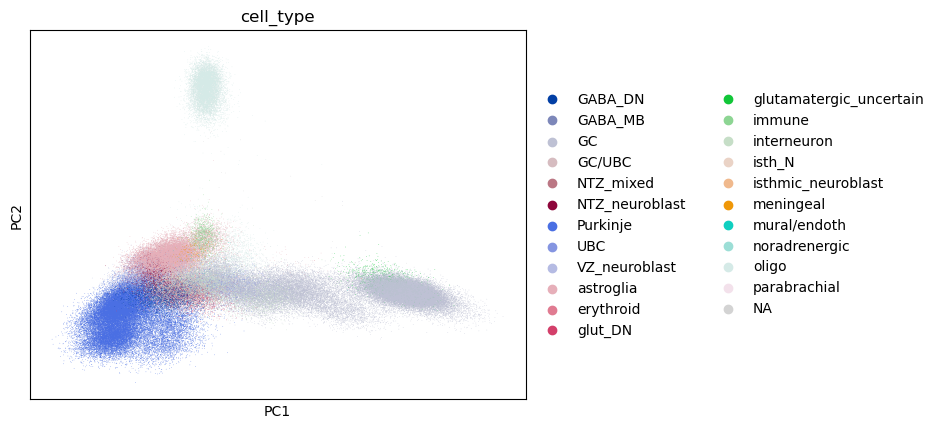

In [9]:
# For comparison, check patterning using other count types
sc.pp.pca(adata_list[1], layer='ds_norm_cts', svd_solver='arpack', mask_var='highly_variable')
sc.pl.pca(adata_list[1], color='cell_type')

/home/cmcphan/.conda/envs/anndata/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


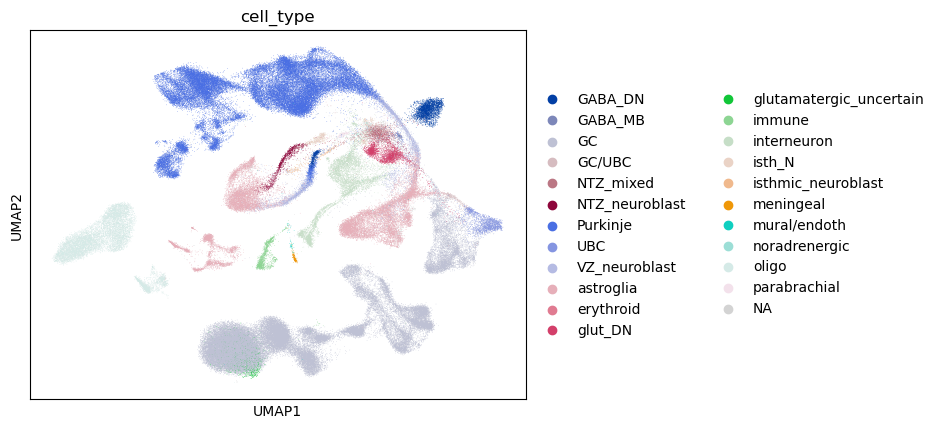

In [10]:
sc.pp.neighbors(adata_list[1])
sc.tl.umap(adata_list[1])
sc.pl.umap(adata_list[1], layer='ds_norm_cts', color='cell_type')

Significantly different compared to using binarized counts - more 'stringy' patterns, possibly less defined overall with some messier groupings.

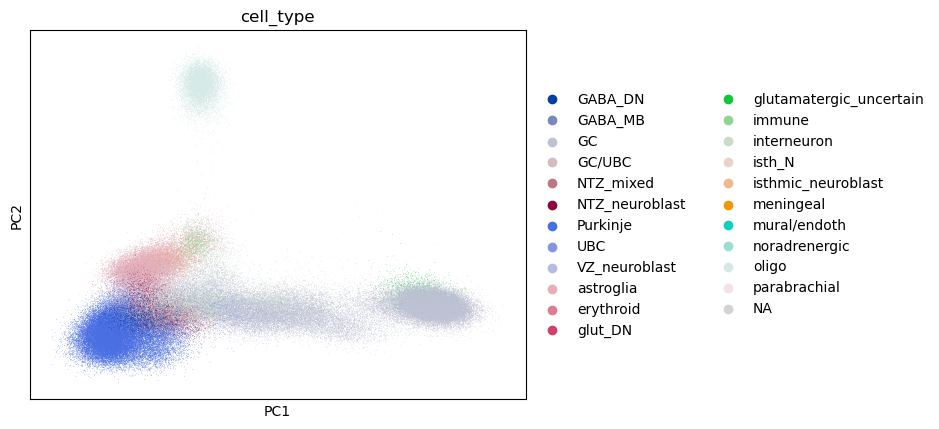

In [11]:
# Try without using highly_variable mask
sc.pp.pca(adata_list[1], layer='binarized_cts', svd_solver='arpack')
sc.pl.pca(adata_list[1], color='cell_type')

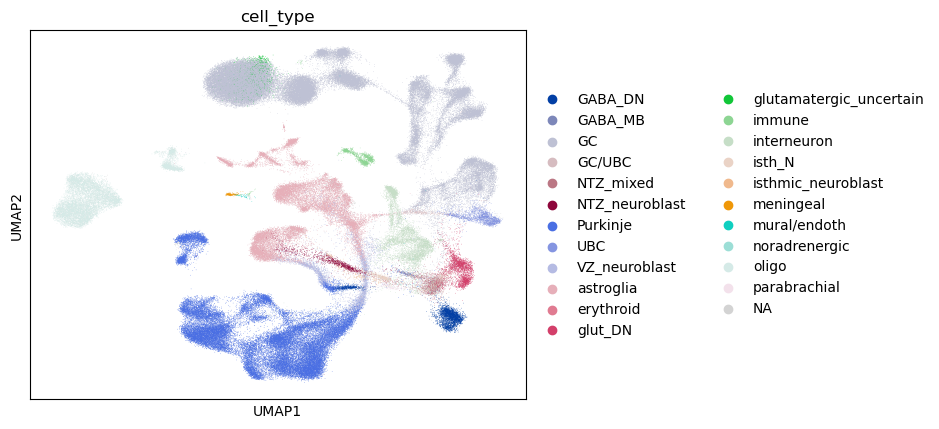

In [12]:
# Without highly_variable mask
sc.pp.neighbors(adata_list[1])
sc.tl.umap(adata_list[1])
sc.pl.umap(adata_list[1], layer='binarized_cts', color='cell_type')

In [13]:
sc.pp.pca(adata_list[1], layer='binarized_cts', svd_solver='arpack', mask_var='highly_variable')

In [14]:
adata_list[1]
# Note new PCA variables in uns, obsm, varm

AnnData object with n_obs × n_vars = 157202 × 27260
    obs: 'orig_cluster', 'orig_sub_cluster', 'broad_lineage', 'cell_type', 'dev_state', 'subtype', 'precisest_label', 'species', 'Tissue', 'TissueID', 'batch', 'Capture.System', 'UMAP1', 'UMAP2', 'Stage', 'stage.ord', 'Stage_exact', 'size_factor', 'sex', 'age', 'fragment', 'rqn_cytoplasm', 'nuclei_preparation', 'chromium_version', 'numerical_age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito'
    var: 'ensembl_gene_id', 'gene_symbol', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Tissue_colors', 'batch_colors', 'batch_colors_dict', 'batch_order', 'fragment_colors', 'nuclei_preparation_colors', 'hvg', 'pca', 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', '

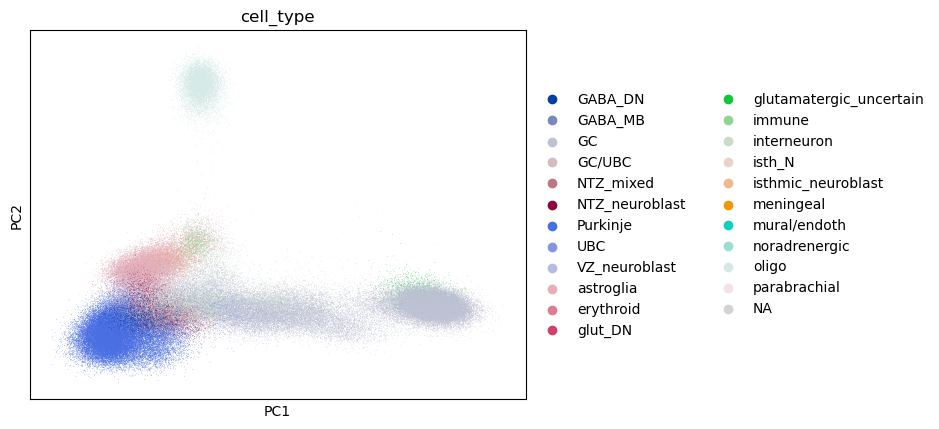

In [15]:
sc.pl.pca(adata_list[1], color='cell_type')

In [16]:
# Calculate nearest neighbours graph
sc.pp.neighbors(adata_list[1])
adata_list[1]
# Note new fields, especially obsp['connectivities'] which is used in the UMAP algorithm

AnnData object with n_obs × n_vars = 157202 × 27260
    obs: 'orig_cluster', 'orig_sub_cluster', 'broad_lineage', 'cell_type', 'dev_state', 'subtype', 'precisest_label', 'species', 'Tissue', 'TissueID', 'batch', 'Capture.System', 'UMAP1', 'UMAP2', 'Stage', 'stage.ord', 'Stage_exact', 'size_factor', 'sex', 'age', 'fragment', 'rqn_cytoplasm', 'nuclei_preparation', 'chromium_version', 'numerical_age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito'
    var: 'ensembl_gene_id', 'gene_symbol', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Tissue_colors', 'batch_colors', 'batch_colors_dict', 'batch_order', 'fragment_colors', 'nuclei_preparation_colors', 'hvg', 'pca', 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', '

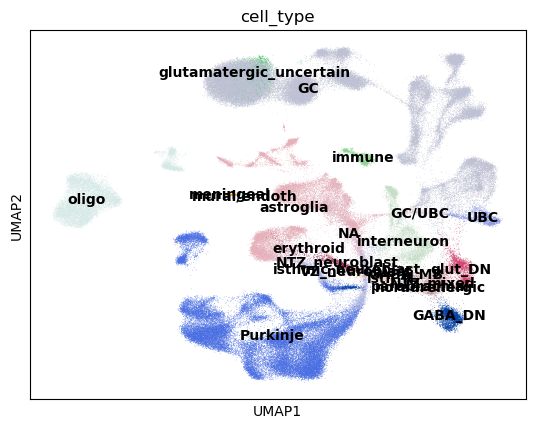

In [17]:
# Calculate and plot UMAP
sc.tl.umap(adata_list[1])
sc.pl.umap(adata_list[1], layer='binarized_cts', color='cell_type', legend_loc='on data')

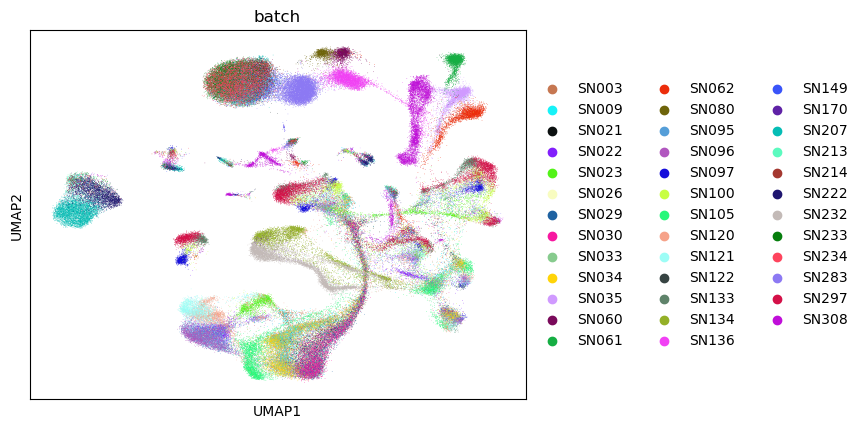

In [18]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='batch')

Doesn't seem to make much difference whether we use only the highly variable genes or not - I suspect the PCA is discarding the less informative genes anyway.

Colouring by numerical age requires that we use a diverging colour map because the max age is so much larger than the early ages.

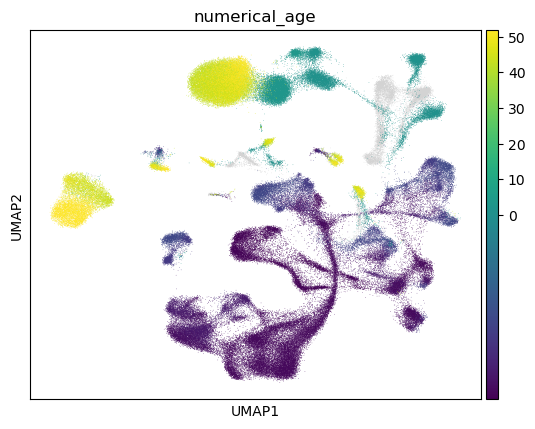

In [19]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='numerical_age', vcenter=0, vmin=-0.6)

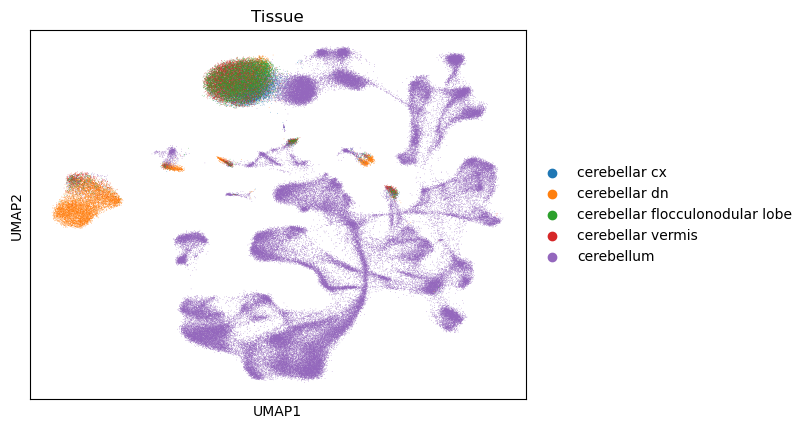

In [20]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='Tissue')

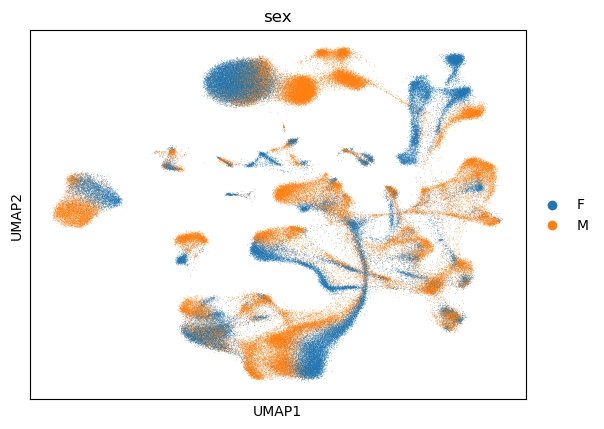

In [21]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='sex')

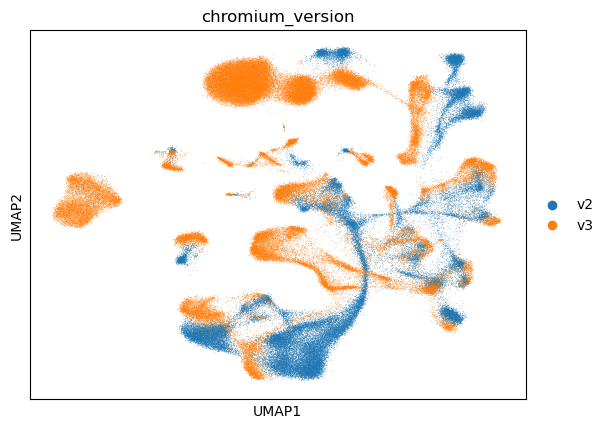

In [22]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='chromium_version')

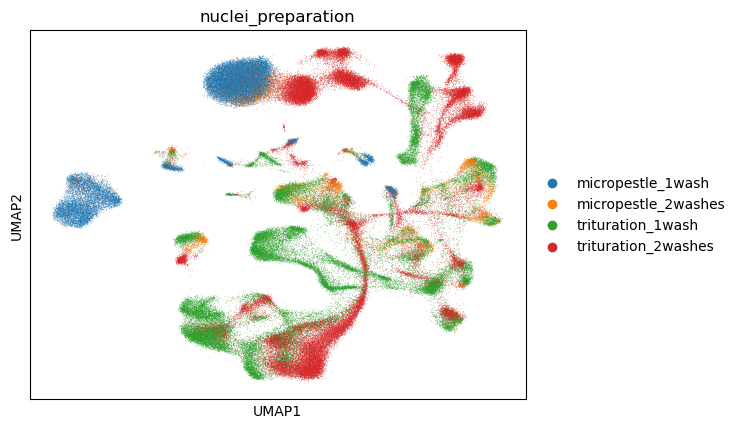

In [23]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='nuclei_preparation')

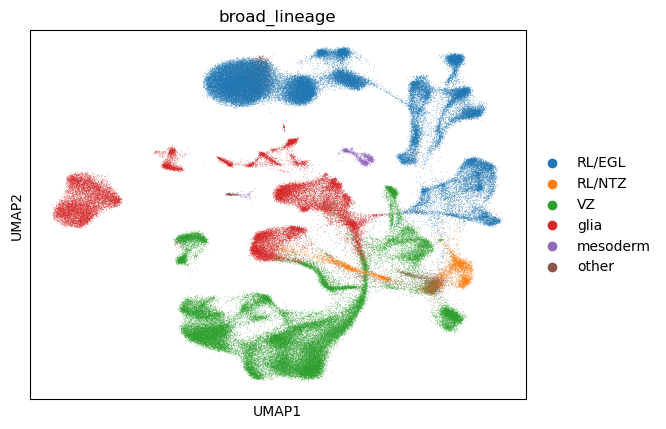

In [24]:
sc.pl.umap(adata_list[1], layer='binarized_cts', color='broad_lineage')

In [25]:
#MOUSE
adata_list[2]

AnnData object with n_obs × n_vars = 65653 × 20424
    obs: 'orig_cluster', 'orig_sub_cluster', 'broad_lineage', 'cell_type', 'dev_state', 'subtype', 'precisest_label', 'species', 'Tissue', 'TissueID', 'batch', 'Capture.System', 'UMAP1', 'UMAP2', 'Stage', 'stage.ord', 'size_factor', 'sex', 'age', 'fragment', 'rqn_cytoplasm', 'nuclei_preparation', 'chromium_version', 'numerical_age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito'
    var: 'ensembl_gene_id', 'gene_symbol', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'batch_colors', 'batch_colors_dict', 'batch_order', 'fragment_colors', 'nuclei_preparation_colors', 'hvg'
    layers: 'binarized_cts', 'downsampled_cts', 'ds_norm_cts'

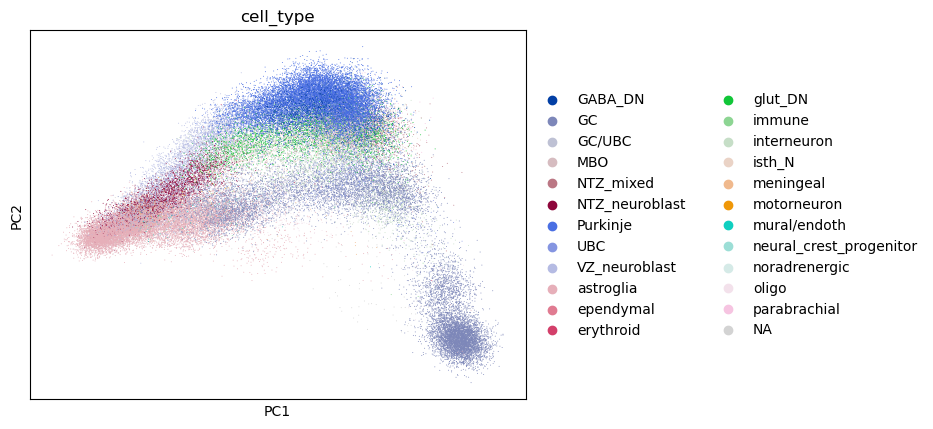

In [26]:
sc.pp.pca(adata_list[2], layer='binarized_cts', svd_solver='arpack', mask_var='highly_variable')
sc.pl.pca(adata_list[2], color='cell_type')

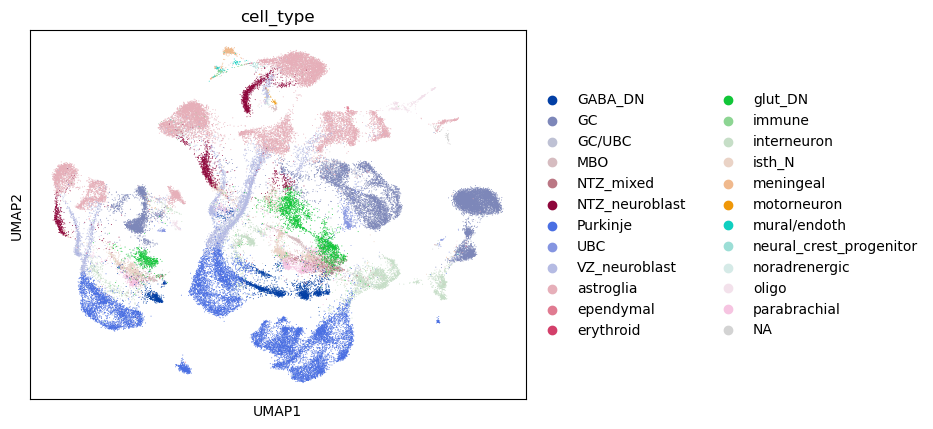

In [27]:
sc.pp.neighbors(adata_list[2])
sc.tl.umap(adata_list[2])
sc.pl.umap(adata_list[2], layer='binarized_cts', color='cell_type')

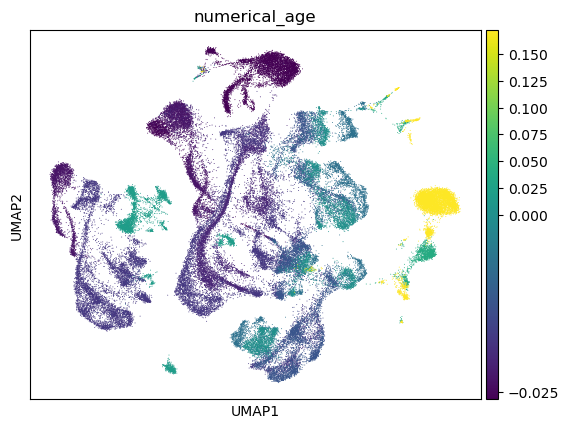

In [28]:
sc.pl.umap(adata_list[2], layer='binarized_cts', color='numerical_age', vcenter=0)

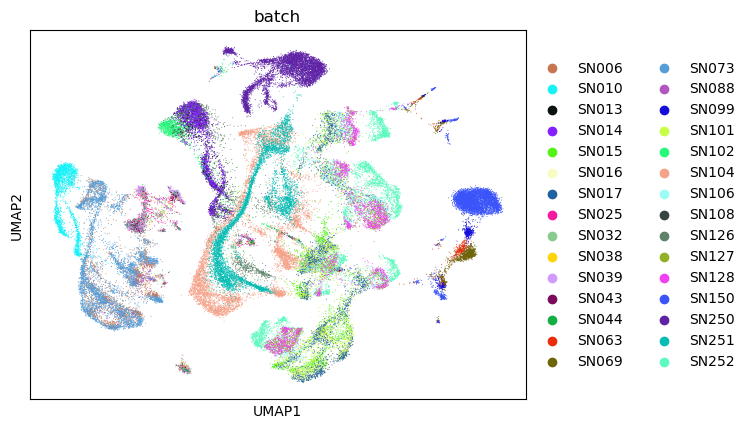

In [29]:
sc.pl.umap(adata_list[2], layer='binarized_cts', color='batch')

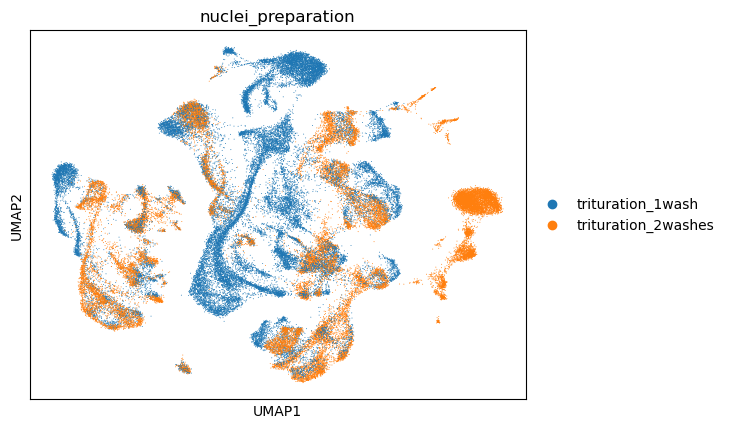

In [30]:
sc.pl.umap(adata_list[2], layer='binarized_cts', color='nuclei_preparation')

Nuclei preparation looks like it could be concerning, however its effects are tied up with individual batches and therefore difficult to untangle from actual developmental effects. For example the clusters on the right which are clearly separated are also the oldest samples, which all used the same preparation method.

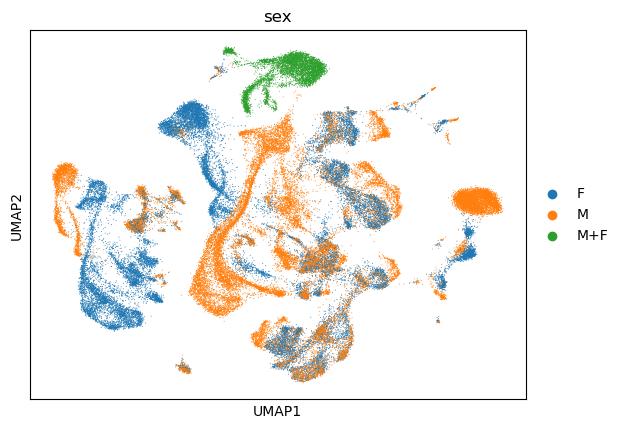

In [31]:
g = sc.pl.umap(adata_list[2], layer='binarized_cts', color='sex', return_fig=True)
g.savefig(str(FIG_PATH+'sepp_mouse_umap_sex.png'), dpi=300, bbox_inches='tight')

The pooled M+F batches seem to cluster out together here - likely want to throw these out, especially as they are very early and we have other batches at similar ages to use instead.

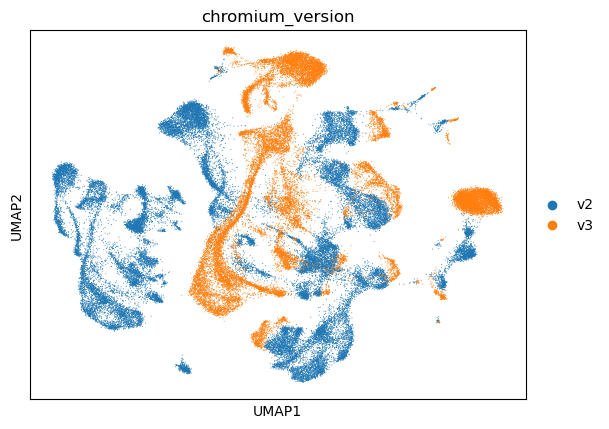

In [32]:
sc.pl.umap(adata_list[2], layer='binarized_cts', color='chromium_version')

Chromium version is known to affect results due to the differing protocols so we expect there to be some differences here. Again though, these are tied up with other batch-specific effects including nuclei preparation method, so difficult to tell how much of a difference it's making.

Mouse data only has cerebellum as tissue type - no subtyping.

In [33]:
# OPOSSUM
adata_list[3]

AnnData object with n_obs × n_vars = 88433 × 28773
    obs: 'orig_cluster', 'orig_sub_cluster', 'broad_lineage', 'cell_type', 'dev_state', 'subtype', 'precisest_label', 'species', 'Tissue', 'TissueID', 'batch', 'Capture.System', 'UMAP1', 'UMAP2', 'Stage', 'stage.ord', 'size_factor', 'sex', 'age', 'fragment', 'rqn_cytoplasm', 'nuclei_preparation', 'chromium_version', 'numerical_age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito'
    var: 'ensembl_gene_id', 'gene_symbol', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'batch_colors', 'batch_colors_dict', 'batch_order', 'fragment_colors', 'nuclei_preparation_colors', 'hvg'
    layers: 'binarized_cts', 'downsampled_cts', 'ds_norm_cts'

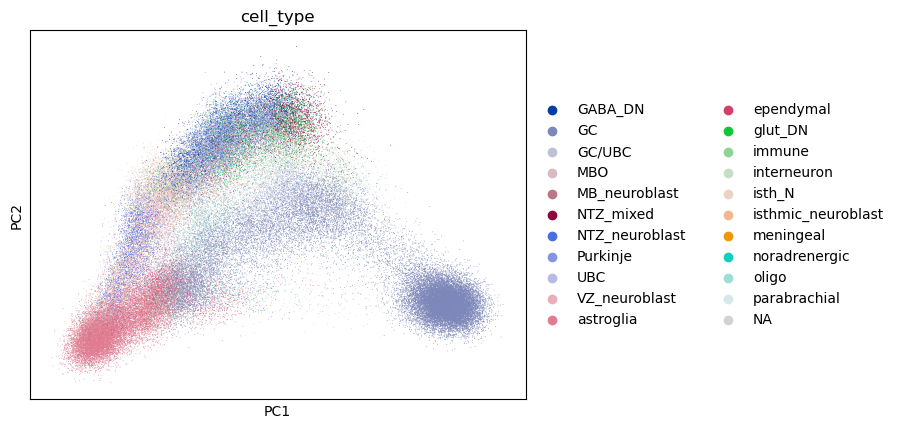

In [34]:
sc.pp.pca(adata_list[3], layer='binarized_cts', svd_solver='arpack', mask_var='highly_variable')
sc.pl.pca(adata_list[3], color='cell_type')

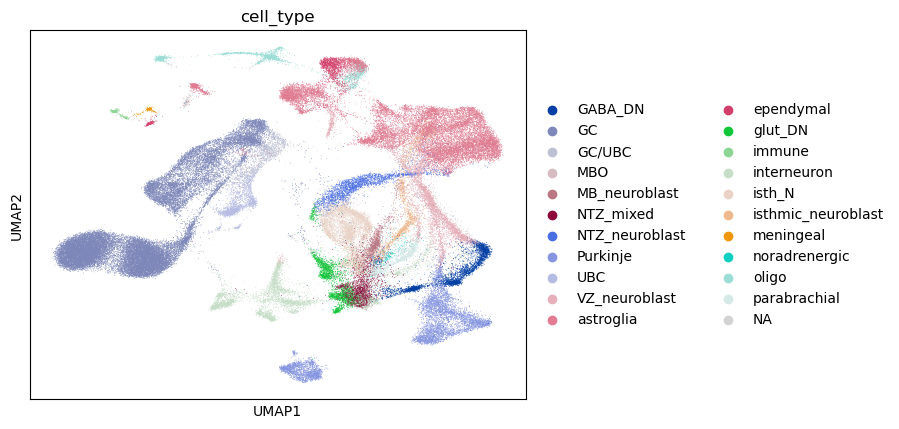

In [35]:
sc.pp.neighbors(adata_list[3])
sc.tl.umap(adata_list[3])
sc.pl.umap(adata_list[3], layer='binarized_cts', color='cell_type')

Opossum data only has cerebellum as tissue, no subtyping.

In [36]:
# Remove M+F pooled batches in mouse data
adata_list[2] = adata_list[2][adata_list[2].obs['sex'] != 'M+F'].copy()

In [37]:
adata_list[2]

AnnData object with n_obs × n_vars = 60028 × 20424
    obs: 'orig_cluster', 'orig_sub_cluster', 'broad_lineage', 'cell_type', 'dev_state', 'subtype', 'precisest_label', 'species', 'Tissue', 'TissueID', 'batch', 'Capture.System', 'UMAP1', 'UMAP2', 'Stage', 'stage.ord', 'size_factor', 'sex', 'age', 'fragment', 'rqn_cytoplasm', 'nuclei_preparation', 'chromium_version', 'numerical_age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito'
    var: 'ensembl_gene_id', 'gene_symbol', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'batch_colors', 'batch_colors_dict', 'batch_order', 'fragment_colors', 'nuclei_preparation_colors', 'hvg', 'pca', 'cell_type_colors', 'neighbors', 'umap', 'sex_colors', 'chromium_version_colors'
    obsm: 'X

In [38]:
adata_list[1].write_h5ad('/group/ll005/cmcphan/sepp_data/sepp_human_normal_reduced.h5ad')
adata_list[2].write_h5ad('/group/ll005/cmcphan/sepp_data/sepp_mouse_normal_reduced.h5ad')
adata_list[3].write_h5ad('/group/ll005/cmcphan/sepp_data/sepp_opossum_normal_reduced.h5ad')

---
### Figures

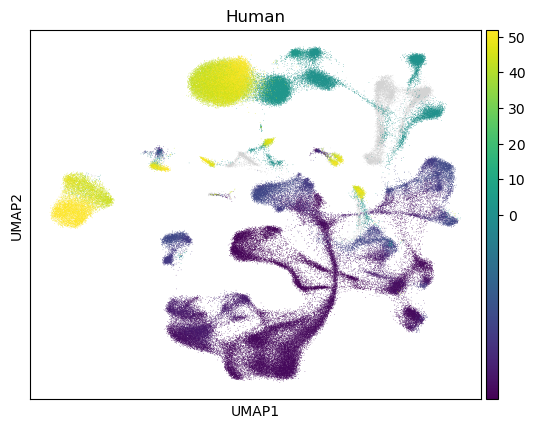

In [39]:
# HUMAN
g = sc.pl.umap(adata_list[1], layer='binarized_cts', color='numerical_age', vcenter=0, vmin=-0.6, title='Human', return_fig=True)
g.savefig(str(FIG_PATH+'sepp_human_umap.png'), dpi=300, bbox_inches='tight')

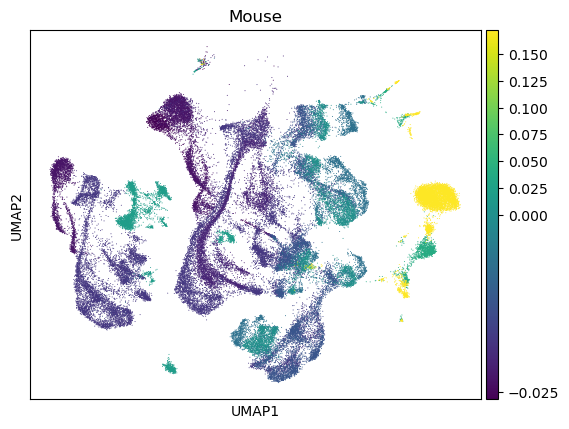

In [40]:
# MOUSE
g = sc.pl.umap(adata_list[2], layer='binarized_cts', color='numerical_age', vcenter=0, title='Mouse', return_fig=True)
g.savefig(str(FIG_PATH+'sepp_mouse_umap.png'), dpi=300, bbox_inches='tight')

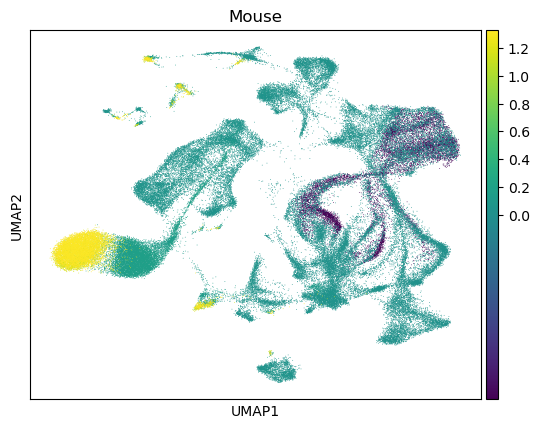

In [41]:
# OPOSSUM
g = sc.pl.umap(adata_list[3], layer='binarized_cts', color='numerical_age', vcenter=0, title='Mouse', return_fig=True)
g.savefig(str(FIG_PATH+'sepp_opossum_umap.png'), dpi=300, bbox_inches='tight')